In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
!ls -la "/content/gdrive/My Drive/bootcamp"

total 422672
-rw------- 1 root root 432811879 Dec 13 17:20 cudnn-10.0-linux-x64-v7.5.0.56.tgz
drwx------ 2 root root      4096 Dec 13 20:10 darknet


In [3]:
!sudo apt-get install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (43.7 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 123635 files and directories currently instal

In [4]:
!tree /content/gdrive/My\ Drive/bootcamp/

/content/gdrive/My Drive/bootcamp/
├── cudnn-10.0-linux-x64-v7.5.0.56.tgz
└── darknet
    └── bin
        └── darknet

2 directories, 2 files


In [5]:
!ln -s "/content/gdrive/My Drive/darknet/" /bootcamp

In [6]:
!ln -s /content/gdrive/My\ Drive/bootcamp/ /mydrive
!ls /mydrive

cudnn-10.0-linux-x64-v7.5.0.56.tgz  darknet


In [7]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [8]:
!tar -xzvf /mydrive/cudnn-10.0-linux-x64-v7.5.0.56.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.5.0
cuda/lib64/libcudnn_static.a


In [9]:
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

#define CUDNN_MAJOR 7
#define CUDNN_MINOR 5
#define CUDNN_PATCHLEVEL 0
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


In [10]:
!git clone https://github.com/kriyeng/darknet/
%cd /content/darknet/

!ls


Cloning into 'darknet'...
remote: Enumerating objects: 10068, done.
remote: Total 10068 (delta 0), reused 0 (delta 0), pack-reused 10068 (from 1)
Receiving objects: 100% (10068/10068), 10.14 MiB | 18.15 MiB/s, done.
Resolving deltas: 100% (6715/6715), done.
/content/darknet
3rdparty      cfg		      darknet.py	include		       README.md
appveyor.yml  cmake		      darknet_video.py	json_mjpeg_streams.sh  scripts
build	      CMakeLists.txt	      data		LICENSE		       src
build.ps1     CMakeSettings.json      image_yolov2.sh	Makefile	       video_v2.sh
build.sh      DarknetConfig.cmake.in  image_yolov3.sh	net_cam_v3.sh	       video_yolov3.sh


In [11]:
!git checkout feature/google-colab

Branch 'feature/google-colab' set up to track remote branch 'feature/google-colab' from 'origin'.
Switched to a new branch 'feature/google-colab'


In [12]:
!ln -s /usr/lib/x86_64-linux-gnu/pkgconfig/opencv4.pc /usr/lib/x86_64-linux-gnu/pkgconfig/opencv.pc
import os
os.environ['PKG_CONFIG_PATH'] = '/usr/lib/x86_64-linux-gnu/pkgconfig/'
!pkg-config --cflags opencv4

-I/usr/include/opencv4 


removido em makefile , devido erro ao compilar

-gencode arch=compute_30,code=sm_30 \
-gencode arch=compute_35,code=sm_35 \

In [13]:
!cd /content/darknet/
!make clean
!make

rm -rf ./obj/image_opencv.o ./obj/http_stream.o ./obj/gemm.o ./obj/utils.o ./obj/dark_cuda.o ./obj/convolutional_layer.o ./obj/list.o ./obj/image.o ./obj/activations.o ./obj/im2col.o ./obj/col2im.o ./obj/blas.o ./obj/crop_layer.o ./obj/dropout_layer.o ./obj/maxpool_layer.o ./obj/softmax_layer.o ./obj/data.o ./obj/matrix.o ./obj/network.o ./obj/connected_layer.o ./obj/cost_layer.o ./obj/parser.o ./obj/option_list.o ./obj/darknet.o ./obj/detection_layer.o ./obj/captcha.o ./obj/route_layer.o ./obj/writing.o ./obj/box.o ./obj/nightmare.o ./obj/normalization_layer.o ./obj/avgpool_layer.o ./obj/coco.o ./obj/dice.o ./obj/yolo.o ./obj/detector.o ./obj/layer.o ./obj/compare.o ./obj/classifier.o ./obj/local_layer.o ./obj/swag.o ./obj/shortcut_layer.o ./obj/activation_layer.o ./obj/rnn_layer.o ./obj/gru_layer.o ./obj/rnn.o ./obj/rnn_vid.o ./obj/crnn_layer.o ./obj/demo.o ./obj/tag.o ./obj/cifar.o ./obj/go.o ./obj/batchnorm_layer.o ./obj/art.o ./obj/region_layer.o ./obj/reorg_layer.o ./obj/reorg_ol

In [14]:
!ls /mydrive/darknet/bin/
!cp -r ./darknet /mydrive/darknet/bin/

darknet


In [ ]:

#!cp /mydrive/darknet/bin/darknet ./darknet
#!chmod +x ./darknet

In [15]:
!chmod +x ./darknet

In [16]:
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

In [17]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2024-12-18 18:24:33--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  14.2MB/s    in 18s     

2024-12-18 18:24:52 (13.0 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [18]:
#!find / -name libcuda.so.1

import os
os.environ['LD_LIBRARY_PATH'] = '/usr/local/cuda-12.2/targets/x86_64-linux/lib/;/usr/local/cuda-12.2/compat/'

!ldconfig -p | grep cuda

!./darknet


	libpcsamplingutil.so (libc6,x86-64) => /usr/local/cuda/targets/x86_64-linux/lib/libpcsamplingutil.so
	libnvrtc.so.12 (libc6,x86-64) => /usr/local/cuda/targets/x86_64-linux/lib/libnvrtc.so.12
	libnvrtc.so (libc6,x86-64) => /usr/local/cuda/targets/x86_64-linux/lib/libnvrtc.so
	libnvrtc-builtins.so.12.2 (libc6,x86-64) => /usr/local/cuda/targets/x86_64-linux/lib/libnvrtc-builtins.so.12.2
	libnvrtc-builtins.so (libc6,x86-64) => /usr/local/cuda/targets/x86_64-linux/lib/libnvrtc-builtins.so
	libnvperf_target.so (libc6,x86-64) => /usr/local/cuda/targets/x86_64-linux/lib/libnvperf_target.so
	libnvperf_host.so (libc6,x86-64) => /usr/local/cuda/targets/x86_64-linux/lib/libnvperf_host.so
	libnvjpeg.so.12 (libc6,x86-64) => /usr/local/cuda/targets/x86_64-linux/lib/libnvjpeg.so.12
	libnvjpeg.so (libc6,x86-64) => /usr/local/cuda/targets/x86_64-linux/lib/libnvjpeg.so
	libnvblas.so.12 (libc6,x86-64) => /usr/local/cuda/targets/x86_64-linux/lib/libnvblas.so.12
	libnvblas.so (libc6,x86-64) => /usr/local/c

In [19]:
#!apt-get update
#!apt-get install -y cuda
!./darknet detect /content/darknet/cfg/yolov3.cfg /content/darknet/yolov3.weights /content/darknet/data/person.jpg -dont-show


layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

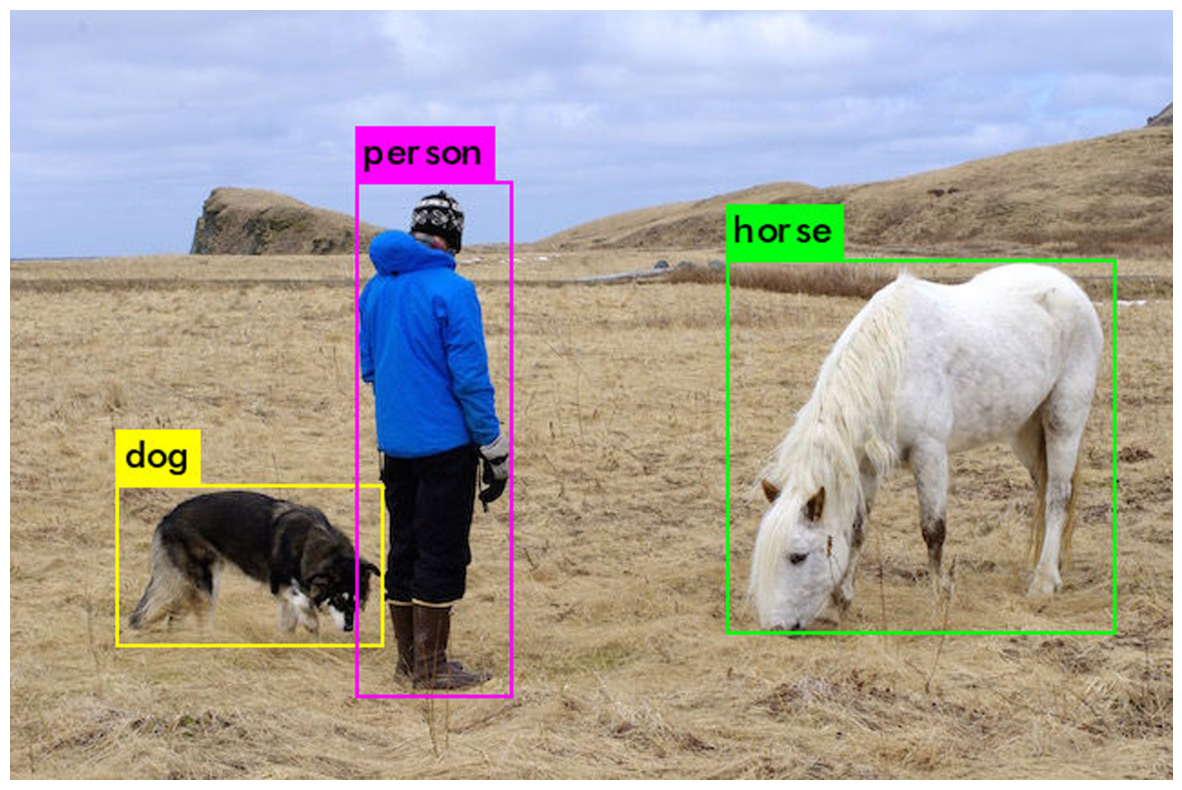

In [20]:
imShow('predictions.jpg')

In [39]:
!mkdir /content/treino/
!cp /mydrive/esquilos.zip /content/treino/
!unzip /content/treino/esquilos.zip

mkdir: cannot create directory ‘/content/treino/’: File exists
Archive:  /content/treino/esquilos.zip
  inflating: esquilos/2021-07-03T06-22-01-frame_0003.jpeg  
  inflating: esquilos/2021-07-03T06-22-01-frame_0003.txt  
  inflating: esquilos/2021-07-03T06-29-38-frame_0002.jpeg  
  inflating: esquilos/2021-07-03T06-29-38-frame_0002.txt  
  inflating: esquilos/2021-07-03T06-30-10-frame_0000.jpeg  
  inflating: esquilos/2021-07-03T06-30-10-frame_0000.txt  
  inflating: esquilos/2021-07-03T06-30-10-frame_0001.jpeg  
  inflating: esquilos/2021-07-03T06-30-10-frame_0001.txt  
  inflating: esquilos/2021-07-03T06-30-10-frame_0002.jpeg  
  inflating: esquilos/2021-07-03T06-30-10-frame_0002.txt  
  inflating: esquilos/2021-07-03T06-30-10-frame_0003.jpeg  
  inflating: esquilos/2021-07-03T06-30-10-frame_0003.txt  
  inflating: esquilos/2021-07-03T06-30-24-frame_0000.jpeg  
  inflating: esquilos/2021-07-03T06-30-24-frame_0000.txt  
  inflating: esquilos/2021-07-03T06-30-24-frame_0003.jpeg  
  inf

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

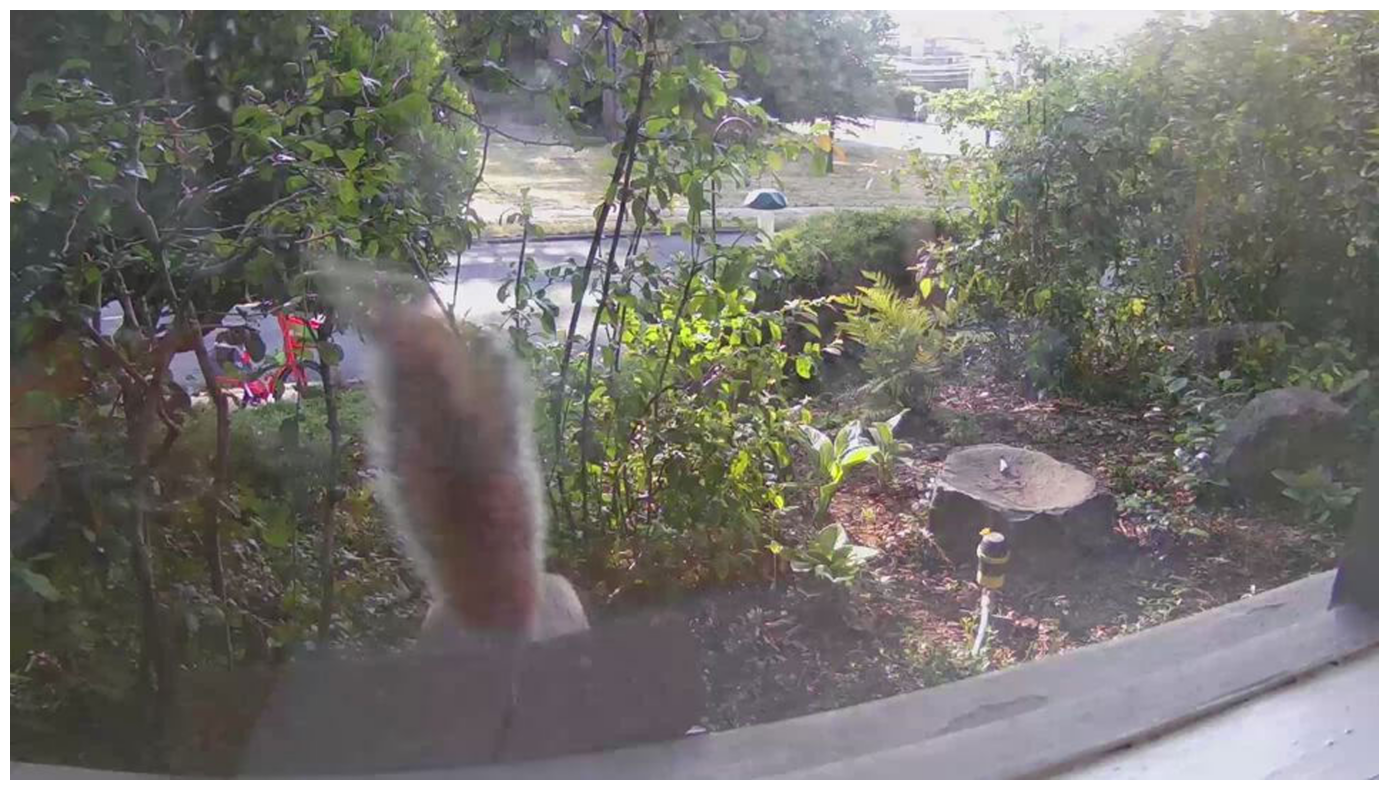

In [40]:
!./darknet detect /content/darknet/cfg/yolov3.cfg /content/darknet/yolov3.weights /content/darknet/esquilos/2021-07-03T07-55-47-frame_0008.jpeg   -dont-show
imShow('predictions.jpg')

In [43]:
import os

def generate_file_lists(directory):
    train_file_path = os.path.join(directory, '/content/treino/train.txt')

    with open(train_file_path, 'w') as train_file:
        for root, _, files in os.walk(directory):
            for file in files:
                if file.endswith('.jpeg'):
                    train_file.write(os.path.join(root, file) + '\n')


    print(f'Lista de arquivos .jpg salva em {train_file_path}')


directory = '/content/darknet/esquilos/'

generate_file_lists(directory)



Lista de arquivos .jpg salva em /content/treino/train.txt


In [59]:

data_content = """classes = 2
train = /content/treino/train.txt
names = /content/treino/obj.names
backup = /content/treino/backup/
"""

data_file_path = '/content/treino/obj.data'

import os
os.makedirs(os.path.dirname(data_file_path), exist_ok=True)

with open(data_file_path, 'w') as data_file:
    data_file.write(data_content)

print(f'Arquivo .data criado em {data_file_path}')


Arquivo .data criado em /content/treino/obj.data


In [58]:
data_content = """esquilo1
esquilo2
"""

data_file_path = '/content/treino/obj.names'

import os
os.makedirs(os.path.dirname(data_file_path), exist_ok=True)

with open(data_file_path, 'w') as data_file:
    data_file.write(data_content)

print(f'Arquivo .names criado em {data_file_path}')

Arquivo .names criado em /content/treino/obj.names


In [36]:
!mkdir /content/treino/backup/

In [52]:
!wget -P /content/treino/ https://pjreddie.com/media/files/darknet53.conv.74

--2024-12-18 18:57:52--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘/content/treino/darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  16.8MB/s    in 10s     

2024-12-18 18:58:03 (15.3 MB/s) - ‘/content/treino/darknet53.conv.74’ saved [162482580/162482580]



é necessário ajustar a configuração do yolov3.cfg de acordo com quantidade de classes e desempenho do treinamento

In [61]:
!./darknet detector train "/content/treino/obj.data" "/content/darknet/cfg/yolov3.cfg" "/content/treino/darknet53.conv.74" -dont_show


valid: Using default '/content/treino/train.txt'
yolov3
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1 

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

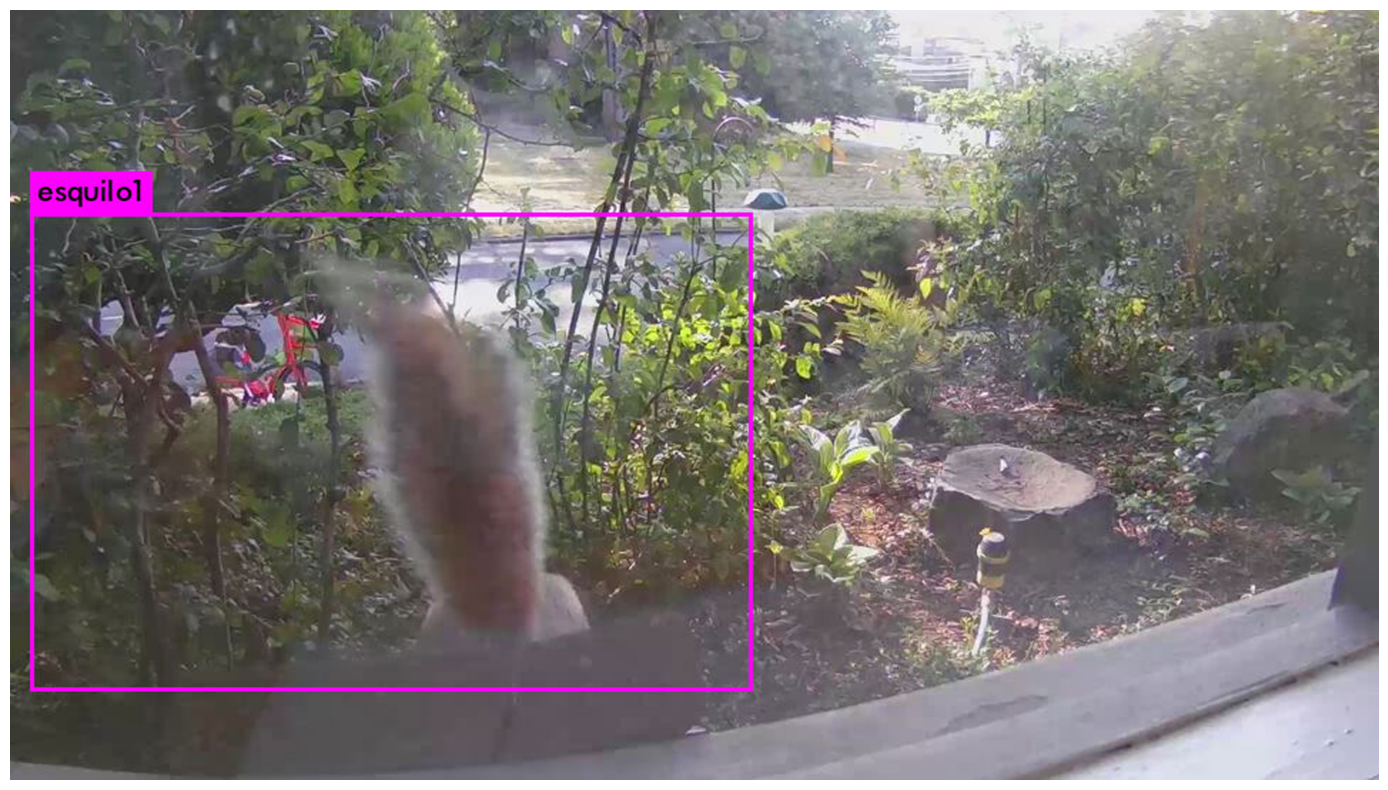

In [64]:
!./darknet detector test "/content/treino/obj.data" "/content/darknet/cfg/yolov3.cfg" "/content/treino/backup//yolov3_1000.weights" "/content/darknet/esquilos/2021-07-03T07-55-47-frame_0008.jpeg" -dont_show
imShow('predictions.jpg')